In [91]:
import json
import os
import pandas as pd


* *LOAD REAL & GENERATED 10 MINUTES NETWORK TRAFFIC*

In [92]:
generated_traffic = []
with open(r'..\Generated_ZigBee_Packets/Experiment_1_one_way_communication_10_minute_generated_message.json', 'r') as f:
    generated_traffic = json.load(f)

#print(generated_traffic)

In [93]:
generated_traffic

'[\n  {"time": "0.0", "src": "0x1de6", "dst": "0xfffc", "protocol": "ZigBee", "length": "80", "info": "Link Status"},\n  {"time": "6.152837", "src": "0x1de6", "dst": "0xd7a7", "protocol": "ZigBee HA", "length": "69", "info": "ZCL: Read Attributes Response, Seq: 10"},\n  {"time": "6.181201", "src": "0x1de6", "dst": "0xd7a7", "protocol": "ZigBee HA", "length": "61", "info": "ZCL: Read Attributes Response, Seq: 11"},\n  {"time": "13.672420", "src": "0x1de6", "dst": "0xfffc", "protocol": "ZigBee", "length": "80", "info": "Link Status"},\n  {"time": "18.386910", "src": "0x1de6", "dst": "0xd7a7", "protocol": "ZigBee HA", "length": "69", "info": "ZCL: Read Attributes Response, Seq: 32"},\n  {"time": "18.416540", "src": "0x1de6", "dst": "0xd7a7", "protocol": "ZigBee HA", "length": "61", "info": "ZCL: Read Attributes Response, Seq: 33"},\n  {"time": "27.204111", "src": "0x1de6", "dst": "0xfffc", "protocol": "ZigBee", "length": "80", "info": "Link Status"},\n  {"time": "32.009583", "src": "0x1de

In [94]:
data = json.loads(generated_traffic)  # Convert string to Python list
generated_traffic = pd.DataFrame(data)

In [95]:
generated_traffic =  pd.DataFrame(generated_traffic)
generated_traffic.head(2)

,time,src,dst,protocol,length,info
0,0.0,0x1de6,0xfffc,ZigBee,80,Link Status
1,6.152837,0x1de6,0xd7a7,ZigBee HA,69,"ZCL: Read Attributes Response, Seq: 10"


In [106]:
real_traffic = []
with open(r'../Datasets/Experiment_1_one_way_communication_10_minute_input_sample.json', 'r') as file:
    for line in file:
        real_traffic.append(json.loads(line))

print(real_traffic )

[{'No.': 1, 'Time': 0.0, 'Source': '0x1de6', 'Destination': 'Broadcast', 'Protocol': 'ZigBee', 'Length': 80, 'Info': 'Link Status', 'Info_clean': 'Link Status'}, {'No.': 2, 'Time': 8.041278, 'Source': '0x1de6', 'Destination': '0xd7a7', 'Protocol': 'ZigBee HA', 'Length': 69, 'Info': 'ZCL: Read Attributes Response, Seq: 216', 'Info_clean': 'ZCL: Read Attributes Response,'}, {'No.': 3, 'Time': 8.073592, 'Source': '0x1de6', 'Destination': '0xd7a7', 'Protocol': 'ZigBee HA', 'Length': 61, 'Info': 'ZCL: Read Attributes Response, Seq: 217', 'Info_clean': 'ZCL: Read Attributes Response,'}, {'No.': 4, 'Time': 14.242098, 'Source': '0x1de6', 'Destination': 'Broadcast', 'Protocol': 'ZigBee', 'Length': 80, 'Info': 'Link Status', 'Info_clean': 'Link Status'}, {'No.': 5, 'Time': 20.786429, 'Source': '0x1de6', 'Destination': '0xd7a7', 'Protocol': 'ZigBee HA', 'Length': 69, 'Info': 'ZCL: Read Attributes Response, Seq: 239', 'Info_clean': 'ZCL: Read Attributes Response,'}, {'No.': 6, 'Time': 20.812187, '

In [107]:
real_traffic  = pd.DataFrame(real_traffic)
real_traffic.head(2)

,No.,Time,Source,Destination,Protocol,Length,Info,Info_clean
0,1,0.000000,0x1de6,Broadcast,ZigBee,80,Link Status,Link Status
1,2,8.041278,0x1de6,0xd7a7,ZigBee HA,69,"ZCL: Read Attributes Response, Seq: 216","ZCL: Read Attributes Response,"


In [108]:
real_traffic = real_traffic.drop(columns=["No.", "Info_clean"])
real_traffic.head(2)

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,0x1de6,Broadcast,ZigBee,80,Link Status
1,8.041278,0x1de6,0xd7a7,ZigBee HA,69,"ZCL: Read Attributes Response, Seq: 216"


In [109]:
generated_traffic.head(2)

,time,src,dst,protocol,length,info
0,0.000000,0x1de6,0xfffc,ZigBee,80,Link Status
1,6.152837,0x1de6,0xd7a7,ZigBee HA,69,"ZCL: Read Attributes Response, Seq: 10"


* *FUNDAMENTAL STATISTICS*

In [110]:
generated_traffic['time']

0        0.000000
1        6.152837
2        6.181201
3       13.672420
4       18.386910
          ...    
124    573.173104
125    573.200428
126    583.218215
127    583.245539
128    589.948055
Name: time, Length: 129, dtype: float64

In [111]:
print(f"\n--- REAL TRAFFIC ---")
print("Number of Packet:", len(real_traffic))
print("Average Packet Size:", real_traffic['Length'].mean())
print("Time Interval Average:", real_traffic['Time'].diff().mean())
print("Time Interval min:", real_traffic['Time'].diff().min())
print("Time Interval max:", real_traffic['Time'].diff().max())

print("Number of source:", real_traffic['Source'].nunique())
print("Number of destination:", real_traffic['Destination'].nunique())

print(f"\n--- GENERATED TRAFFIC ---")
print("Number of Packet:", len(generated_traffic))
print("Average Packet Size:", (generated_traffic['length'].astype(int)).mean())
print("Time Interval Average:", (generated_traffic['time'].astype(float)).diff().mean())
print("Time Interval min:", (generated_traffic['time'].astype(float)).diff().min())
print("Time Interval max:", (generated_traffic['time'].astype(float)).diff().max())
print("Number of source:", generated_traffic['src'].nunique())
print("Number of destination:", generated_traffic['dst'].nunique())




--- REAL TRAFFIC ---
Number of Packet: 128
Average Packet Size: 69.0078125
Time Interval Average: 4.710761527559055
Time Interval min: 0.00524799999999459
Time Interval max: 16.249922999999995
Number of source: 1
Number of destination: 2

--- GENERATED TRAFFIC ---
Number of Packet: 129
Average Packet Size: 69.3875968992248
Time Interval Average: 4.6089691796875
Time Interval min: 0.016586000000017975
Time Interval max: 15.094351000000003
Number of source: 1
Number of destination: 2


* *SIMILARITY METRICS - JENSEN SHANNON FUNCTION*

In [102]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

def distribution_similarity(real_traffic, gen_traffic, bins=10):

    # Normalization and Histogram
    real_hist, _ = np.histogram(real_traffic, bins=bins, density=True)
    gen_hist, _ = np.histogram(gen_traffic, bins=bins, density=True)

    # Prevent zeros by adding lower case numbers
    """Jensen-Shannon Divergence can have problems with histograms containing zeros (log(0) is undefined). 
    Therefore, a small number (1e-9) is added to the histograms to remove the zeros."""
    real_hist += 1e-9
    gen_hist += 1e-9

    # Similarity Calculation
    """Jensen-Shannon Divergence (JSD): Measures the similarity between two probability distributions 
    (0: exactly the same, 1: completely different)."""
    js = jensenshannon(real_hist, gen_hist)

    return js


In [103]:
""" JENSEN SHANNON FOR PACKET SIZE"""

generated_traffic['length'] = pd.to_numeric( generated_traffic['length'], errors='coerce')
real_traffic['Length'] = pd.to_numeric(real_traffic['Length'], errors='coerce')

js_packet = distribution_similarity(real_traffic['Length'], generated_traffic['length'])
print(f"\nJensen-Shannon for package size: {js_packet:.4f}")

""" JENSEN SHANNON FOR TIMESTAMPT"""

generated_traffic['time'] = pd.to_numeric( generated_traffic['time'], errors='coerce')
real_traffic['Time'] = pd.to_numeric(real_traffic['Time'], errors='coerce')

js_packet = distribution_similarity(real_traffic['Time'], generated_traffic['time'] )
print(f"\nJensen-Shannon for time: {js_packet:.4f}")


Jensen-Shannon for package size: 0.0177

Jensen-Shannon for time: 0.0413


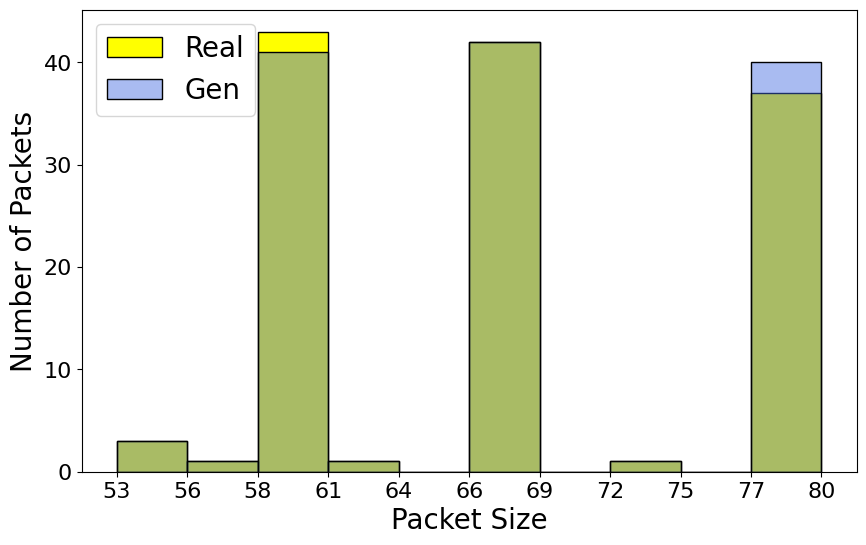

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribution_with_js(real_traffic, gen_traffic, bins=10):

    js = distribution_similarity(real_traffic, gen_traffic, bins)

    plt.figure(figsize=(10, 6))

    min_val = min(real_traffic.min(), gen_traffic.min())
    max_val = max(real_traffic.max(), gen_traffic.max())
    bin_edges = np.linspace(min_val, max_val, bins + 1)

    sns.histplot(real_traffic, bins=bin_edges, color="yellow", stat='count', label='Real', alpha=1)
    sns.histplot(gen_traffic, bins=bin_edges, color="royalblue", stat='count', label='Gen', alpha=0.45)

    plt.xlabel("Packet Size", fontsize=20)
    plt.ylabel("Number of Packets", fontsize=20)
    plt.legend(fontsize=20)

    plt.xticks(bin_edges, labels=[f"{edge:.0f}" for edge in bin_edges], fontsize=16)
    plt.yticks(fontsize=16)

    plt.savefig(r'Results-Figures/exp1_JSD_packet_size.png', bbox_inches='tight')
    plt.show()

plot_distribution_with_js(real_traffic['Length'], generated_traffic['length'])

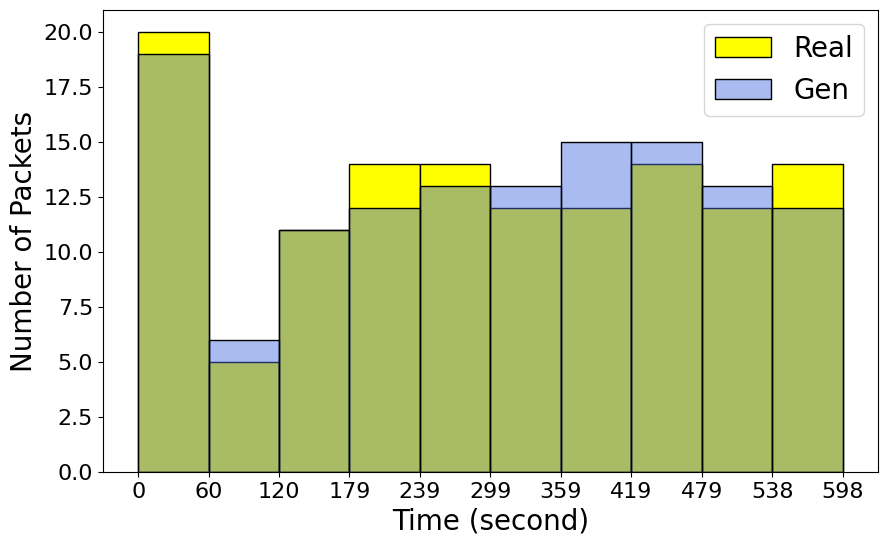

In [105]:
def plot_distribution_with_js(real_traffic, gen_traffic, bins=10):

    js = distribution_similarity(real_traffic, gen_traffic, bins)

    plt.figure(figsize=(10, 6))

    min_val = min(real_traffic.min(), gen_traffic.min())
    max_val = max(real_traffic.max(), gen_traffic.max())
    bin_edges = np.linspace(min_val, max_val, bins + 1)


    sns.histplot(real_traffic, bins=bin_edges, color="yellow", stat='count', label='Real',  alpha=1)
    sns.histplot(gen_traffic, bins=bin_edges, color="royalblue", stat='count', label='Gen',   alpha=0.45)

    #plt.title(f"Distribution Comparison in terms of Time\nJensen-Shannon = {js:.4f}", fontsize = 20)
    plt.xlabel("Time (second)", fontsize = 20)
    plt.ylabel("Number of Packets", fontsize = 20)
    plt.legend(fontsize = 20)
    #plt.grid(True)
    #plt.tight_layout()
    plt.xticks(bin_edges, labels=[f"{edge:.0f}" for edge in bin_edges], fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(r'Results-Figures/exp1_JSD_time.png', bbox_inches='tight')
    plt.show()
plot_distribution_with_js(real_traffic['Time'], generated_traffic['time'] )
